In [1]:
import os

def create_md_files(base_path):
    for week_num in range(1, 7):  # Looping from week 1 to 6
        week_files = [
            (f"week{week_num}.0", f"# week{week_num}"),
            (f"week{week_num}.1", f"# Lecture {2*week_num - 1}."),
            (f"week{week_num}.2", f"# Lecture {2*week_num}."),
            (f"week{week_num}.3", f"# Additional notes"),
            (f"worksheet{week_num}note", f"#worksheet{week_num}note"),
        ]

        for filename, header in week_files:
            file_path = os.path.join(base_path, f"{filename}.md")
            if not os.path.exists(file_path):
                with open(file_path, 'w') as f:
                    f.write(header + "\n\n")

base_path = "/Users/graceliu/Downloads/comp90051notes/"
create_md_files(base_path)


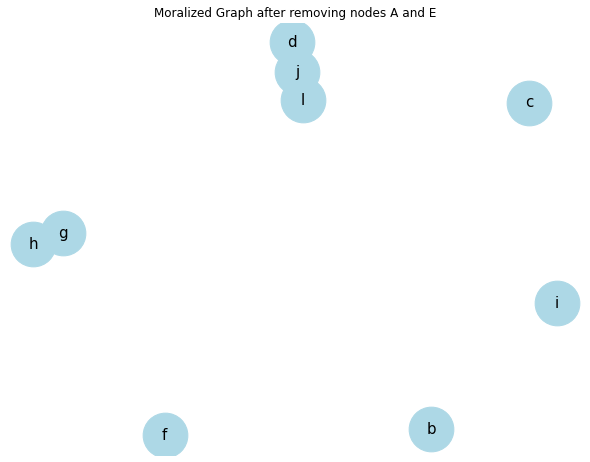

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph based on the relationships
G = nx.DiGraph()

# Add edges based on the given relationships
edges = [("a", "d"), ("d", "j"), ("j", "l"), ("a", "c"), ("a", "b"), 
         ("a", "e"), ("e", "i"), ("f", "a"), ("g", "h"), ("h", "e")]
G.add_edges_from(edges)

# Remove nodes A and E
G.remove_node("a")
G.remove_node("e")

# Moralize the graph by connecting parents of removed nodes
# For A: its only parent is F, so no additional edges are needed.
# For E: its parents are H (and A which is already removed). H's only other parent is G and they're already connected.

# Convert the directed graph to an undirected graph for moralization
G = G.to_undirected()

# Draw the moralized graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="lightblue", font_size=15)
plt.title("Moralized Graph after removing nodes A and E")
plt.show()
